In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("code")
import numpy as np
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
from npm3dGenerator_tree import NPM3DGenerator, NPM3DGenerator_full
from models import build_point_net, save_model, load_model
import utils_training as u_t

Using TensorFlow backend.


../Benchmark/training_10_classes_subsampled_2\Lille1_2_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille1_2.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille1_2_normals.npy
../Benchmark/training_10_classes_subsampled_2\Lille2_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille2.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille2_normals.npy
../Benchmark/training_10_classes_subsampled_2\Paris_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Paris.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Paris_normals.npy



../Benchmark/training_10_classes_subsampled_2\Lille1_1_tree.joblib
LOADING TREE
DONE
MODIFIYING PATHS ../Benchmark/training_10_classes_subsampled_2\Lille1_1.ply
LOADING NORMALS ../Benchmark/training_10_classes_subsampled_2\Lille1_1_normals.npy

[  2.282537   5.243769  33.179123 169.81613   32.47143   15.554446
  24.446503  13.716806   7.919863]


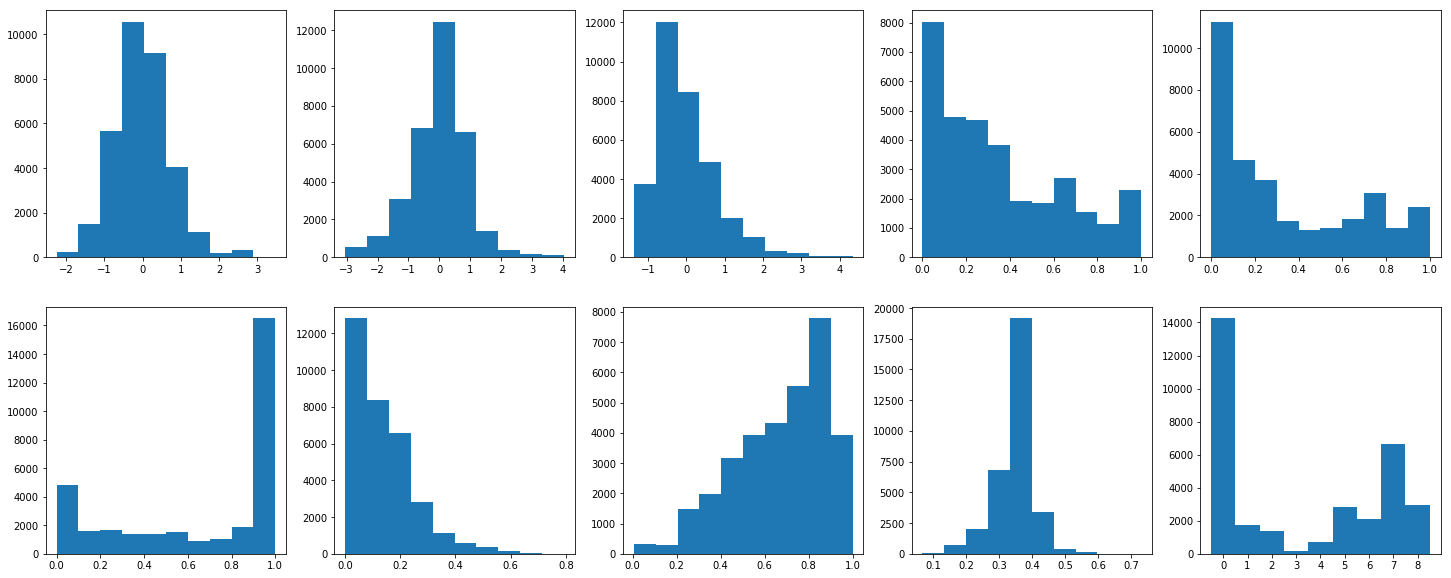

In [3]:
training_dataset = NPM3DGenerator_full(paths_to_keep = [1, 2, 3], sample_uniformly_from_classes = True,
                                       use_reflectance = False)
validation_dataset = NPM3DGenerator_full(paths_to_keep = [0], sample_uniformly_from_classes = False,
                                         use_reflectance = False, evaluation = True)

print(training_dataset.class_weight)
training_dataset.show_samples()

In [ ]:
miou_metric = u_t.mIoU(training_dataset.n_classes)

#model = build_point_net(input_shape = (training_dataset.n_points, training_dataset.n_channels),
#                        output_shape = training_dataset.n_classes)
start_model = 13
model = load_model("models/trained_{}epochs_uniform_{}_{}_{}".format(start_model, training_dataset.n_points, training_dataset.n_channels, training_dataset.n_classes))
model.compile("adam", u_t.my_categorical_crossentropy, metrics = ["accuracy", miou_metric.miou])
#model.summary()

In [ ]:
n_epochs = 10
for i in range(n_epochs):
    history = model.fit_generator(training_dataset, epochs = 1,
                              validation_data = validation_dataset,
                              class_weight = training_dataset.class_weight,
                              verbose = 0, callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)])
    save_model(model, "models/trained_{}epochs_uniform_{}_{}_{}".format(i + start_model + 1, training_dataset.n_points, training_dataset.n_channels, training_dataset.n_classes))
u_t.plot_history(history)

In [ ]:
save_model(model, "trained_{}finalepochs_uniform_{}_{}_{}".format(n_epochs + 3, training_dataset.n_points, training_dataset.n_channels, training_dataset.n_classes))

In [ ]:
test_dataset = NPM3DGenerator_full(input_dir = "../Benchmark/test_10_classes_subsampled_2", train = False, use_reflectance = False)
#model = load_model("trained_1epochs_uniform_{}_{}_{}".format(test_dataset.n_points, test_dataset.n_channels, test_dataset.n_classes))

In [ ]:
for d in range(3):
    for i in range(25):
        plt.hist(test_dataset.sample_point_cloud(d)[0][:, 9], alpha = .1, color = 'b')
    plt.show()

In [ ]:
probas, predictions = test_dataset.predict_point_cloud(model, index = 0)
probas, predictions = test_dataset.predict_point_cloud(model, index = 1)
probas, predictions = test_dataset.predict_point_cloud(model, index = 2)

In [ ]:
probas, predictions = test_dataset.predict_point_cloud(model, index = 2)